# Importing the libraries

In [33]:
import numpy as np
import rasterio
import matplotlib.pyplot as plt
import xarray as xr
import rioxarray as rxr
import geopandas as gpd
import pandas as pd
import harmonize as hz
import seaborn as sns
import nc_time_axis
import cftime

# Load the data cube and original data to compare

In [2]:
# Create a path to the data directory
path_data = "../data/Raw/"

In [36]:
# Load the data set
ndvi = xr.open_dataset(path_data + 'Raw_NDVI_16D_1km.nc')
lai = xr.open_dataset(path_data + 'Raw_LAI_8D_500m.nc')
evap = xr.open_dataset(path_data + 'Raw_Evap_8D_500m.nc')
era = xr.open_dataset(path_data + 'Raw_weather_4H_9km.nc')
lst_night = xr.open_dataset(path_data + 'Raw_LST_Night_1D_1km.nc')
lst_day = xr.open_dataset(path_data + 'Raw_LST_Day_1D_1km.nc')
active_fire = xr.open_dataset(path_data + 'Raw_ActiveFire_500m.nc')
burn_mask = xr.open_dataset(path_data + 'Raw_BurnMask_1km.nc')
fwi = xr.open_mfdataset(path_data + '/Raw_Fwi/*.nc', combine='by_coords', chunks=None)
density = rxr.open_rasterio(path_data + 'fra_pd_2015_1km_UNadj.tif', masked=True).squeeze()
datacube = xr.open_dataset(path_data + 'datacube1.nc', chunks=None, decode_coords="all")

In [37]:
# Select the variables of interest
ndvi_filter = ndvi['_1_km_16_days_EVI']
lai_filter = lai['Fpar_500m']
evap_filter = evap['ET_500m']
era_filter = era[['u10', 'v10', 't2m', 'tp']]
lst_night_filter = lst_night['LST_Night_1km']
lst_day_filter = lst_day['LST_Day_1km']
# fwi_filter = fwi['fwi-daily-proj']
active_fire_filter = active_fire[['First_Day', 'Last_Day', 'Burn_Date']]
burn_mask_filter = burn_mask['FireMask']

In [5]:
datacube

<xarray.Dataset>
Dimensions:            (x: 298, y: 253, time: 4019)
Coordinates:
  * x                  (x) float64 3.415e+05 3.424e+05 ... 6.157e+05 6.167e+05
  * y                  (y) float64 5.018e+06 5.017e+06 ... 4.786e+06 4.785e+06
  * time               (time) object 2010-01-01 00:00:00 ... 2021-01-01 00:00:00
    crs                int32 ...
    band               int32 ...
    spatial_ref        int32 ...
Data variables:
    ET_500m            (time, y, x) float32 ...
    Fpar_500m          (time, y, x) float64 ...
    density            (y, x) float32 ...
    u10                (time, y, x) float64 ...
    v10                (time, y, x) float64 ...
    t2m                (time, y, x) float64 ...
    tp                 (time, y, x) float64 ...
    First_Day          (time, y, x) float64 ...
    Last_Day           (time, y, x) float64 ...
    Burn_Date          (time, y, x) float64 ...
    FireMask           (time, y, x) float32 ...
    _1_km_16_days_EVI  (time, y, x) float64 ...
Attributes:
    Conventions:  CF-1.6
    history:      2022-09-15 13:57:35 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...

# Comparaison of the datacube and the original data

# NDVI

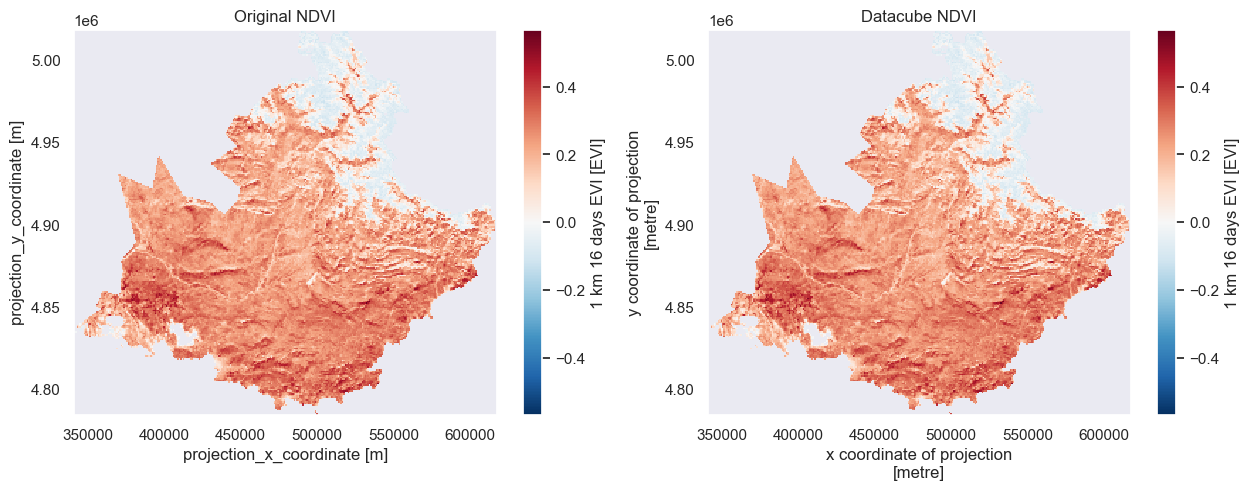

In [6]:
# Plot the EVI from the original dataset and the datacube with seaborn
sns.set_theme(style="darkgrid")
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ndvi_filter.sel(time='2019-01-01').plot(ax=ax[0])
datacube['_1_km_16_days_EVI'].sel(time='2019-01-01').plot(ax=ax[1])
ax[0].set_title('Original NDVI')
ax[1].set_title('Datacube NDVI')
plt.show()


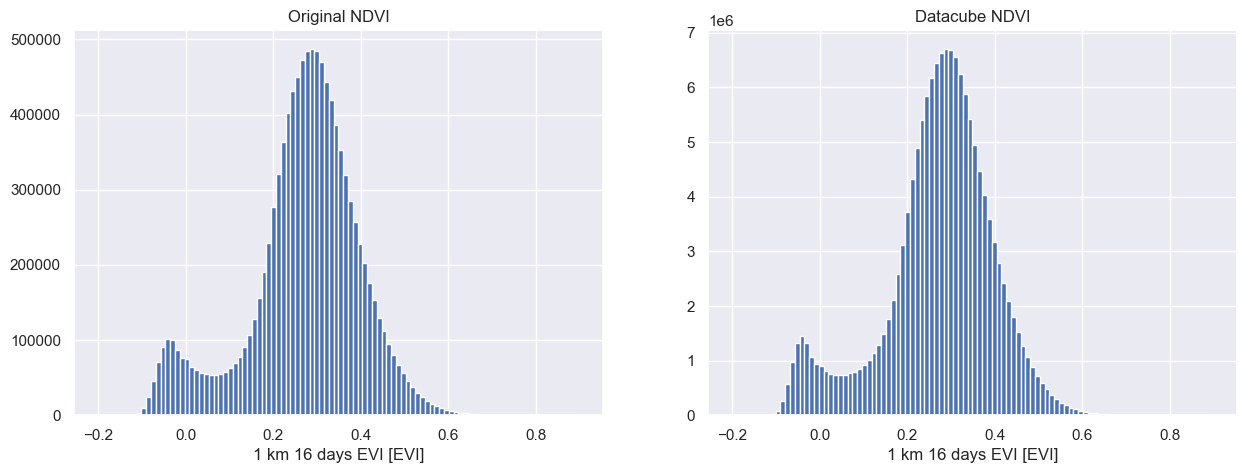

In [7]:
# Plot the EVI distribution from the original dataset and the datacube
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ndvi_filter.plot.hist(ax=ax[0], bins=100)
datacube['_1_km_16_days_EVI'].plot.hist(ax=ax[1], bins=100)
ax[0].set_title('Original NDVI')
ax[1].set_title('Datacube NDVI')
plt.show()

In [26]:
# Measure percentage of missing values
print('Original NDVI: ', ndvi_filter.isnull().sum().values / ndvi_filter.size * 100, '%')
print('Datacube NDVI: ', datacube['_1_km_16_days_EVI'].isnull().sum().values / datacube['_1_km_16_days_EVI'].size * 100, '%')

Original NDVI:  50.737450160571704 %
Datacube NDVI:  50.8763144013069 %


# LAI

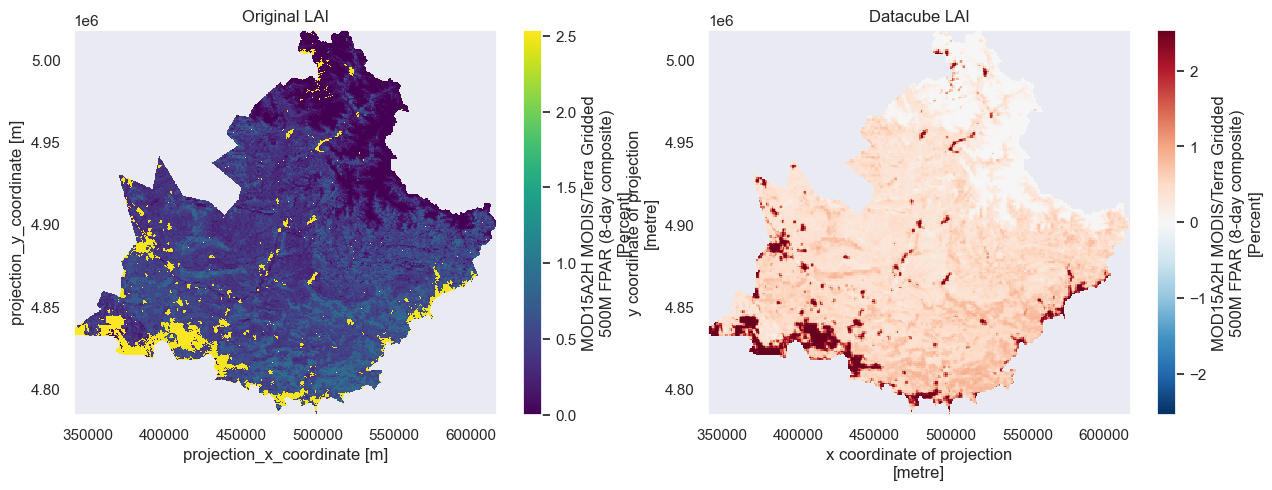

In [8]:
# Plot the Fpar from the original dataset and the datacube with seaborn
sns.set_theme(style="darkgrid")
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
lai_filter.sel(time='2019-01-01').plot(ax=ax[0])
datacube['Fpar_500m'].sel(time='2019-01-01').plot(ax=ax[1])
ax[0].set_title('Original LAI')
ax[1].set_title('Datacube LAI')
plt.show()


In [27]:
# Measure percentage of missing values
print('Original LAI: ', lai_filter.isnull().sum().values / lai_filter.size * 100, '%')
print('Datacube LAI: ', datacube['Fpar_500m'].isnull().sum().values / datacube['Fpar_500m'].size * 100, '%')

Original LAI:  50.45910641484317 %
Datacube LAI:  50.647266360718355 %


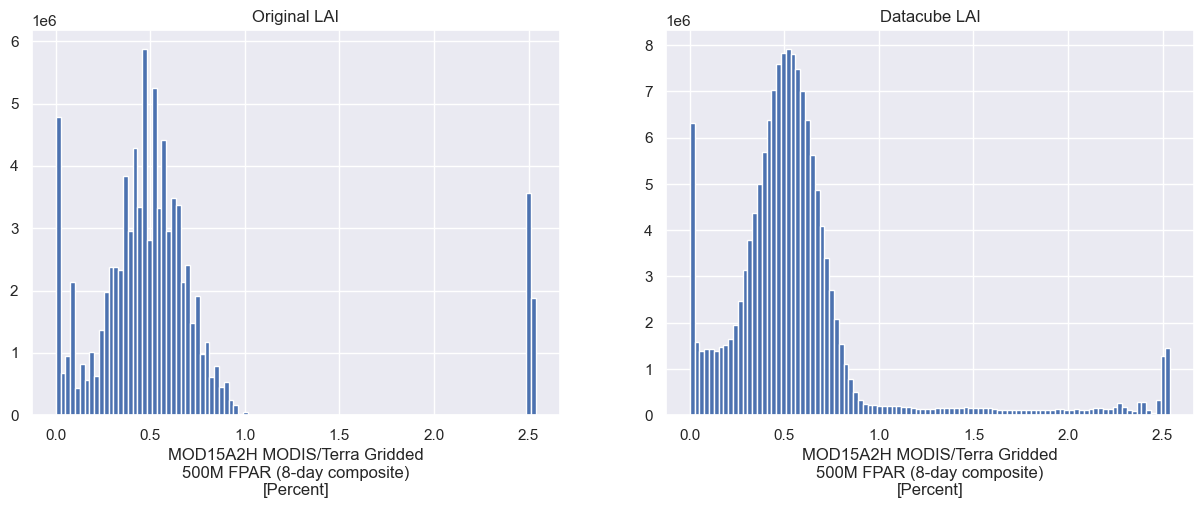

In [9]:
# Plot the Fpar distribution from the original dataset and the datacube
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
lai_filter.plot.hist(ax=ax[0], bins=100)
datacube['Fpar_500m'].plot.hist(ax=ax[1], bins=100)
ax[0].set_title('Original LAI')
ax[1].set_title('Datacube LAI')
plt.show()

In [10]:
# Statistics of the Fpar on the original dataset and the datacube
print('Original LAI')
print('The mean is: ', lai_filter.mean().values)
print('The standard deviation is: ', lai_filter.std().values)
print('The minimum is: ', lai_filter.min().values)
print('The maximum is: ', lai_filter.max().values)
print('The median is: ', lai_filter.median().values)

print('-------------------')
print('Datacube LAI')
print('The mean is: ', datacube['Fpar_500m'].mean().values)
print('The standard deviation is: ', datacube['Fpar_500m'].std().values)
print('The minimum is: ', datacube['Fpar_500m'].min().values)
print('The maximum is: ', datacube['Fpar_500m'].max().values)
print('The median is: ', datacube['Fpar_500m'].median().values)



Original LAI
The mean is:  0.5842182
The standard deviation is:  0.5626097917556763
The minimum is:  0.0
The maximum is:  2.5399999618530273
The median is:  0.4899999797344208
-------------------
Datacube LAI
The mean is:  0.5817183938355989
The standard deviation is:  0.45917675244593
The minimum is:  -1.1102230246251565e-16
The maximum is:  2.5399999618530273
The median is:  0.5121874734759331


In [11]:
# Counting the unique values of the Fpar on the original dataset and the datacube



In [12]:
print(lai_filter.groupby(lai_filter['Fpar_']).count())

KeyError: 'Fpar_'

# Evapotranspiration

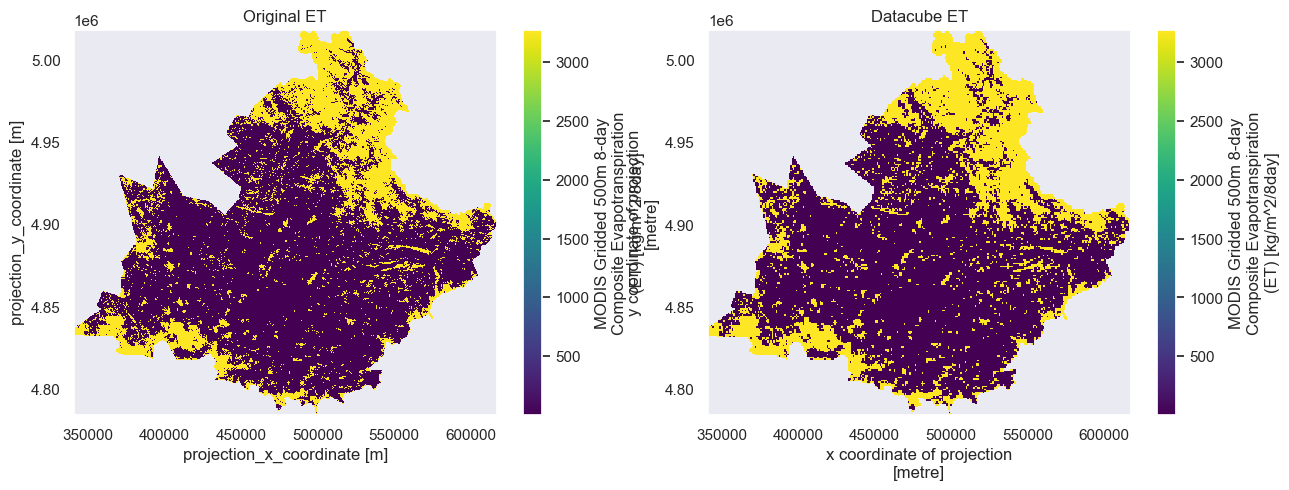

In [13]:
# Plot the ET from the original dataset and the datacube
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
evap_filter.sel(time='2019-01-01').plot(ax=ax[0])
datacube['ET_500m'].sel(time='2019-01-01').plot(ax=ax[1])
ax[0].set_title('Original ET')
ax[1].set_title('Datacube ET')
plt.show()

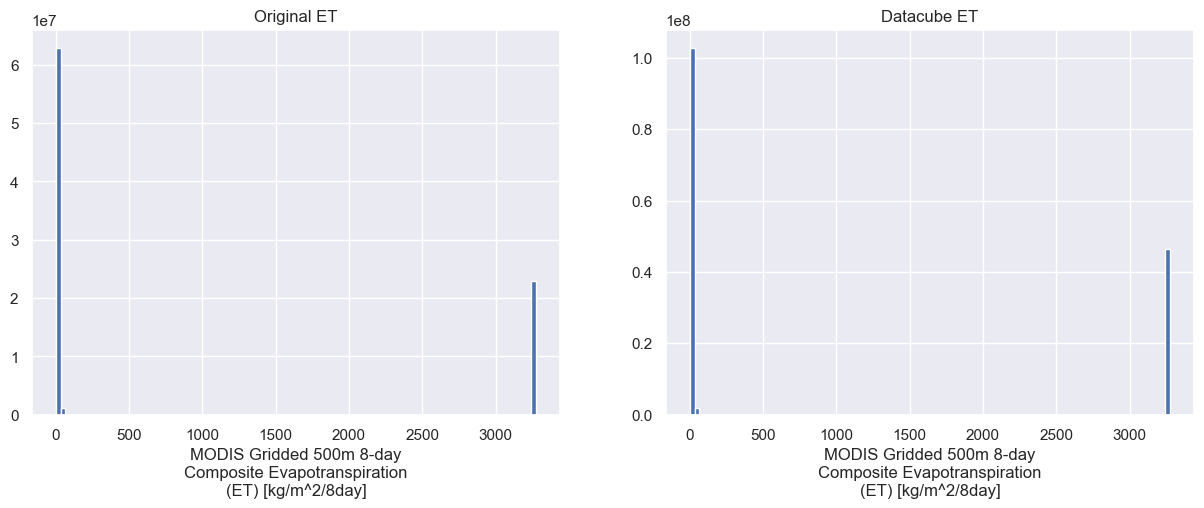

In [14]:
# Plot the ET distribution from the original dataset and the datacube
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
evap_filter.plot.hist(ax=ax[0], bins=100)
datacube['ET_500m'].plot.hist(ax=ax[1], bins=100)
ax[0].set_title('Original ET')
ax[1].set_title('Datacube ET')
plt.show()

In [15]:
# Counting the unique values of the ET on the original dataset and the datacube
print(evap.groupby('ET_500m').count())


KeyboardInterrupt



In [ ]:
len(np.unique(evap_filter.values))

In [ ]:
len(np.unique(datacube['ET_500m'].values))

In [ ]:
# Statistics of the ET on the original dataset and the datacube
print('Original ET')
print(evap_filter.mean().values)
print(evap_filter.std().values)
print(evap_filter.min().values)
print(evap_filter.max().values)
print('-------------------')
print('Datacube ET')
print(datacube['ET_500m'].mean().values)
print(datacube['ET_500m'].std().values)
print(datacube['ET_500m'].min().values)
print(datacube['ET_500m'].max().values)

The distribution has been quiet changed. We have a lot more unique value than before. The mean is quite similar but the standard deviation has been reduced. We have to keep this in mind, maybe we will need to accomplish a categorical interpolation instead of a linear one.

In [29]:
# Measure percentage of missing values
print('Original ET: ', evap_filter.isnull().sum().values / evap_filter.size * 100, '%')
print('Datacube ET: ', datacube['ET_500m'].isnull().sum().values / datacube['ET_500m'].size * 100, '%')


Original ET:  50.424827356685256 %
Datacube ET:  50.06233917818395 %


# ERA5

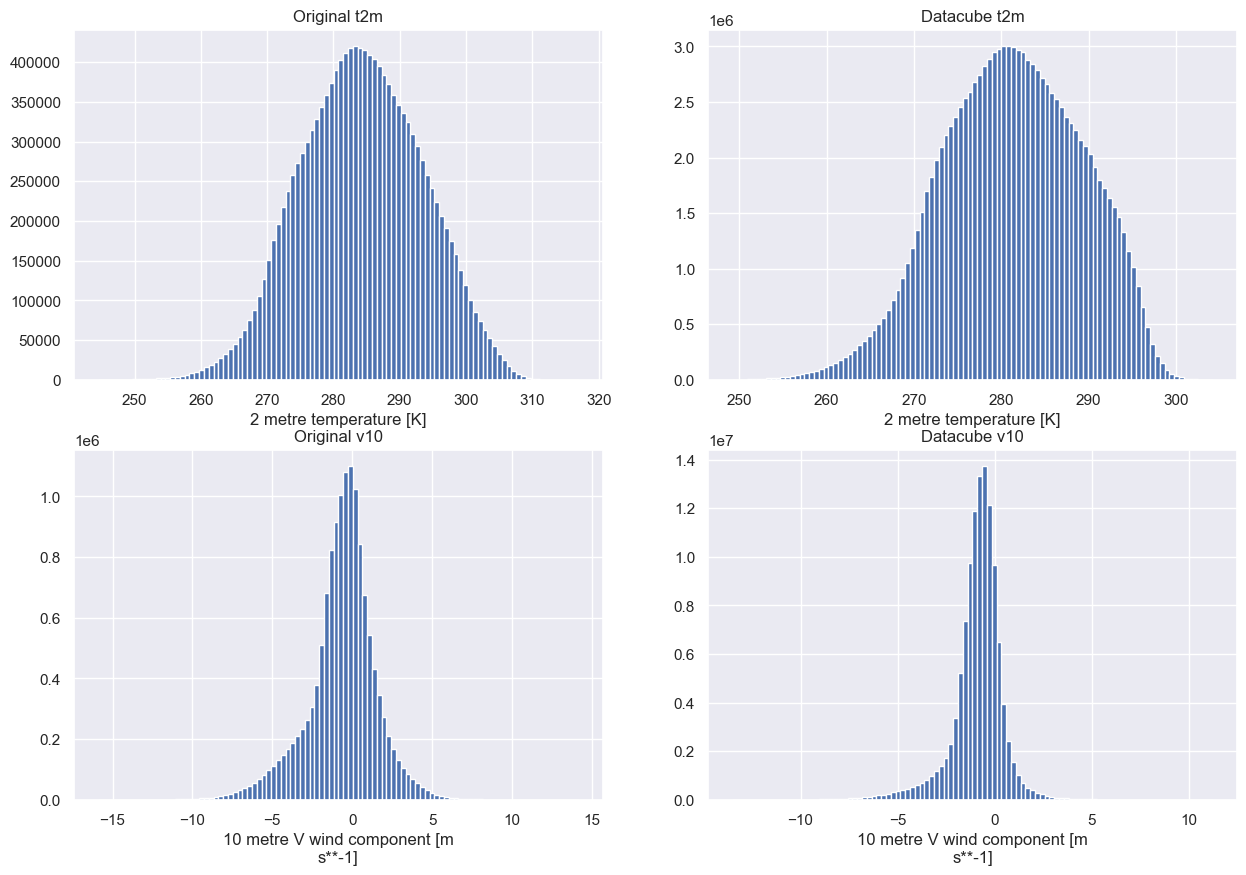

In [16]:
# Plot the distribution of the variables 't2m', 'v10', 'u10', 'tp' of the era_filter dataset and the datacube
fig, ax = plt.subplots(2, 2, figsize=(15, 10))
era_filter['t2m'].plot.hist(ax=ax[0, 0], bins=100)
datacube['t2m'].plot.hist(ax=ax[0, 1], bins=100)
era_filter['v10'].plot.hist(ax=ax[1, 0], bins=100)
datacube['v10'].plot.hist(ax=ax[1, 1], bins=100)
ax[0, 0].set_title('Original t2m')
ax[0, 1].set_title('Datacube t2m')
ax[1, 0].set_title('Original v10')
ax[1, 1].set_title('Datacube v10')
plt.show()


In [20]:
# Measure the percentage of missing value for the variable t2m in the original dataset and the datacube
print('Original t2m')
print('The percentage of missing value is: ', era_filter['t2m'].isnull().sum().values / era_filter['t2m'].size * 100)
print('-------------------')
print('Datacube t2m')
print('The percentage of missing value is: ', datacube['t2m'].isnull().sum().values / datacube['t2m'].size * 100)


Original t2m
The percentage of missing value is:  19.973544973544975
-------------------
Datacube t2m
The percentage of missing value is:  61.1471607432143


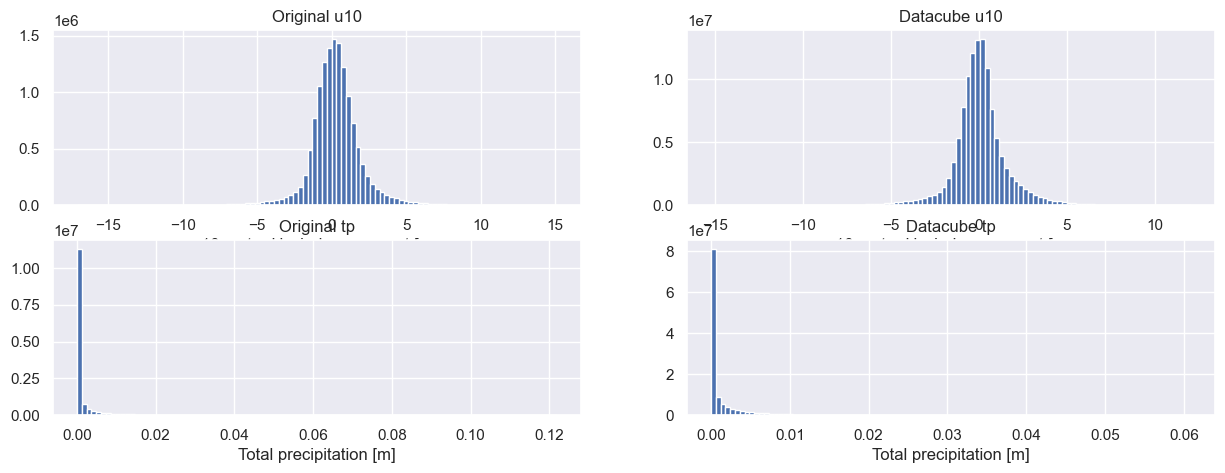

In [17]:
# Plot the distribution of the variables 'u10','tp' of the era_filter dataset and the datacube
fig, ax = plt.subplots(2, 2, figsize=(15, 5))
era_filter['u10'].plot.hist(ax=ax[0, 0], bins=100)
datacube['u10'].plot.hist(ax=ax[0, 1], bins=100)
era_filter['tp'].plot.hist(ax=ax[1, 0], bins=100)
datacube['tp'].plot.hist(ax=ax[1, 1], bins=100)
ax[0, 0].set_title('Original u10')
ax[0, 1].set_title('Datacube u10')
ax[1, 0].set_title('Original tp')
ax[1, 1].set_title('Datacube tp')
plt.show()


In [18]:
# Statistics of the variables 't2m', 'v10', 'u10', 'tp' of the era_filter dataset and the datacube
print('Original t2m')
print(era_filter['t2m'].mean().values)
print(era_filter['t2m'].std().values)
print(era_filter['t2m'].min().values)
print(era_filter['t2m'].max().values)
print('-------------------')
print('Datacube t2m')
print(datacube['t2m'].mean().values)
print(datacube['t2m'].std().values)
print(datacube['t2m'].min().values)
print(datacube['t2m'].max().values)
print('-------------------')
print('Original v10')
print(era_filter['v10'].mean().values)
print(era_filter['v10'].std().values)
print(era_filter['v10'].min().values)
print(era_filter['v10'].max().values)
print('-------------------')
print('Datacube v10')
print(datacube['v10'].mean().values)
print(datacube['v10'].std().values)
print(datacube['v10'].min().values)
print(datacube['v10'].max().values)
print('-------------------')

Original t2m
284.23575
23.649995803833008
244.51171875
316.970703125
-------------------
Datacube t2m
281.2240548252858
7.9854846215713975
249.22249722084715
304.1800871599809
-------------------
Original v10
-0.6489328
2.1059980392456055
-15.894668579101562
14.166116714477539
-------------------
Datacube v10
-0.8924993477054943
1.310937635269933
-13.51399183586534
11.229773098812574
-------------------


In [46]:
# Measure the percentage of missing value for the variable v10 in the original dataset and the datacube
print('Original v10')
print('The percentage of missing value is: ', era_filter['v10'].isnull().sum().values / era_filter['v10'].size * 100)
print('-------------------')
print('Datacube v10')
print('The percentage of missing value is: ', datacube['v10'].isnull().sum().values / datacube['v10'].size * 100)


Original v10
The percentage of missing value is:  19.973544973544975
-------------------
Datacube v10
The percentage of missing value is:  61.1471607432143


In both case we notice the deviation has been reduced after interpolation.

We can notice that the pourcentage of missing values has been triple between the original dataset and the datacube. For the other it remains the same. Let's have a look at which step of transformation is responsible for this. For the sake of speed we will only look at the variable 't2m'. and for one year.


In [38]:
# Get the subset of the era_filter for the variable 't2m' and the year 2018
era_filter_subset = era_filter['t2m'].sel(time='2018')

The first transformation is the resampling. Let's have a look at the pourcentage of missing values before and after resampling.

In [39]:
# Write CRS
era_filter_subset_crs = hz.define_crs(era_filter_subset, 4326)
# Define the AOI
aoi = hz.define_area_of_interest(path_data + 'AreaOfInterest.zip')
# Clip the data sets to the AOI
era_filter_subset_crs_clip = hz.clip_to_aoi(era_filter_subset, aoi)


In [42]:
# Resample the data to daily
era_filter_subset_crs_clip_daily = hz.resample_to_daily(era_filter_subset_crs_clip)

In [47]:
 #   Definition of the common grid
common_grid = rxr.open_rasterio(path_data + 'Raw_LST_Day_1D_1km.nc').isel(time=0)
# Create a CRS object from a poj4 string for sinuoidal projection
crs_sinu = rasterio.crs.CRS.from_string("+proj=sinu +lon_0=0 +x_0=0 +y_0=0 +a=6371007.181 +b=6371007.181 +units=m +no_defs")
# Projection of the era into sinuoidal projection
era_sinu = era_filter_subset_crs_clip_daily.rio.reproject(crs_sinu)
# Regrid the era data to the common grid
era_filter_final = hz.interpolate_to_common_grid(era_sinu, common_grid)
# Directly regrid the era data to the common grid
era_filter_final_direct = hz.interpolate_to_common_grid(era_filter_subset_crs_clip_daily, common_grid)

In [48]:
# Measure the percentage of missing value for the variable t2m in the all version of era_filter
print('Original t2m')
print('The percentage of missing value is: ', era_filter['t2m'].isnull().sum().values / era_filter['t2m'].size * 100)
print('-------------------')
print('Original t2m subset')
print('The percentage of missing value is: ', era_filter_subset.isnull().sum().values / era_filter_subset.size * 100)
print('-------------------')
print('Original t2m subset crs')
print('The percentage of missing value is: ', era_filter_subset_crs.isnull().sum().values / era_filter_subset_crs.size * 100)
print('-------------------')
print('Original t2m subset crs clip')
print('The percentage of missing value is: ', era_filter_subset_crs_clip.isnull().sum().values / era_filter_subset_crs_clip.size * 100)
print('-------------------')
print('Original t2m subset crs clip daily')
print('The percentage of missing value is: ', era_filter_subset_crs_clip_daily.isnull().sum().values / era_filter_subset_crs_clip_daily.size * 100)
print('-------------------')
print('Original t2m subset crs clip daily sinu')
print('The percentage of missing value is: ', era_sinu.isnull().sum().values / era_sinu.size * 100)
print('-------------------')
print('Original t2m subset crs clip daily sinu common grid')
print('The percentage of missing value is: ', era_filter_final.isnull().sum().values / era_filter_final.size * 100)
print('-------------------')
print('Original t2m subset crs clip daily common grid')
print('The percentage of missing value is: ', era_filter_final_direct.isnull().sum().values / era_filter_final_direct.size * 100)



Original t2m
The percentage of missing value is:  19.973544973544975
-------------------
Original t2m subset
The percentage of missing value is:  19.973544973544975
-------------------
Original t2m subset crs
The percentage of missing value is:  19.973544973544975
-------------------
Original t2m subset crs clip
The percentage of missing value is:  47.878787878787875
-------------------
Original t2m subset crs clip daily
The percentage of missing value is:  48.02158572021586
-------------------
Original t2m subset crs clip daily sinu
The percentage of missing value is:  46.106925418569254
-------------------
Original t2m subset crs clip daily sinu common grid
The percentage of missing value is:  51.03890756904096
-------------------
Original t2m subset crs clip daily common grid
The percentage of missing value is:  50.90809522650144


# Fire Mask

In [22]:
# Print the legend of the variable FireMask
print(datacube['FireMask'].legend)

Classes:
0 missing input data
1 not processed (obsolete)
2 not processed (obsolete)
3 non-fire water
4 cloud
5 non-fire land
6 unknown
7 fire (low confidence)
8 fire (nominal confidence)
9 fire (high confidence)


In [23]:
np.unique(datacube['FireMask'].values)

array([ 3.,  4.,  5.,  6.,  7.,  8.,  9., nan], dtype=float32)

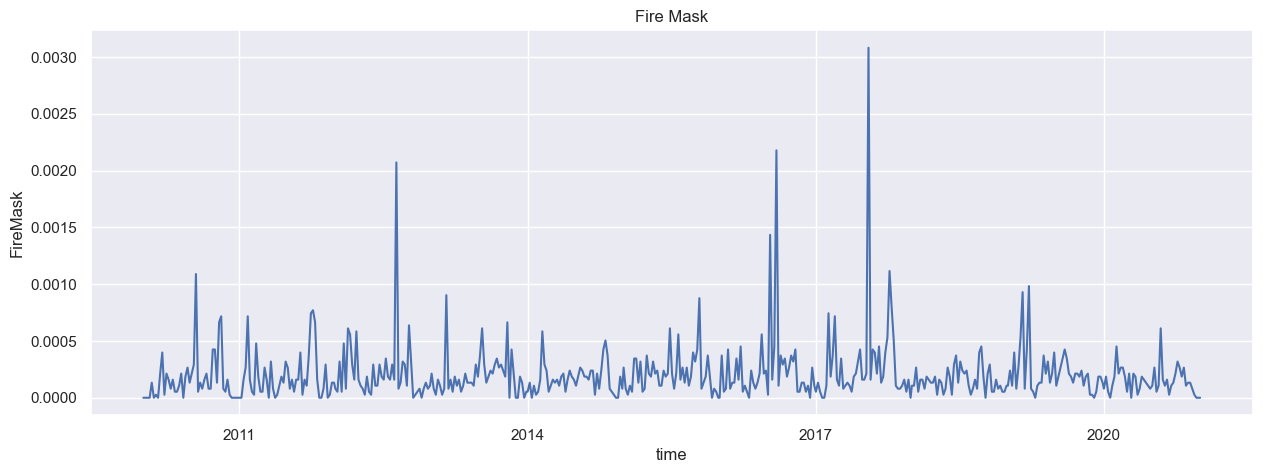

In [24]:
# SumClasses:of the count when FireMask is equal to 7,8 or 9
# filter burn_mask to the same time as datacube
burn_mask = burn_mask.sel(time=slice('2010-01-01', '2021-01-01'))
count_fire = burn_mask['FireMask'].where(burn_mask['FireMask']>=7).count(dim=['ydim','xdim'])
# Sum all the count
count_all = burn_mask['FireMask'].count(dim=['ydim','xdim'])

# Plot the coutn_fire by the count_all
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
(count_fire/count_all).plot(ax=ax)
ax.set_title('Fire Mask')
plt.show()



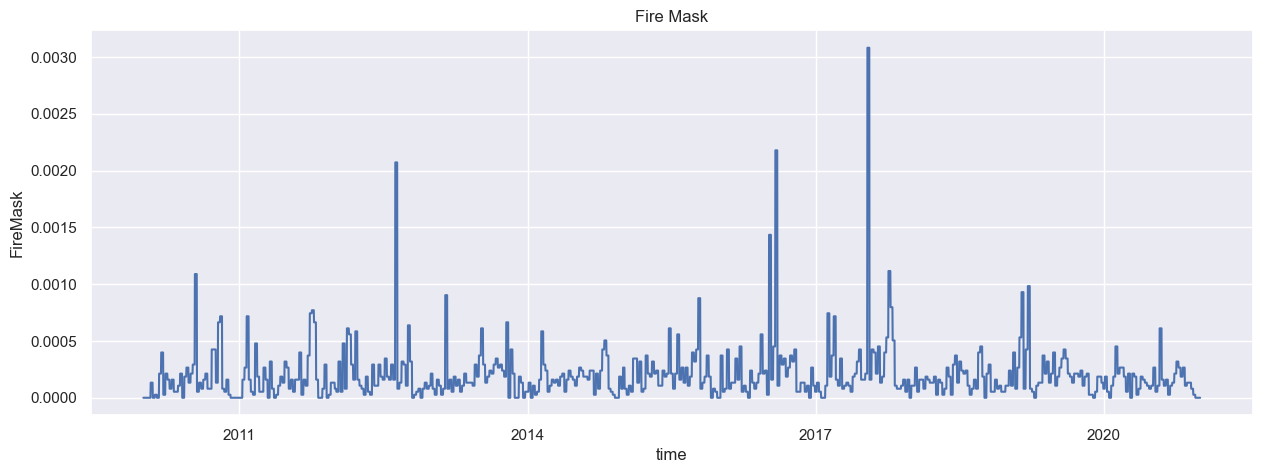

In [25]:
# Plot the percent of pixel of the variable FireMask equal to 7,8 or 9 in the datacube above all the pixel
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
(datacube['FireMask'].where(datacube['FireMask']>=7).count(dim=['y','x'])/datacube['FireMask'].count(dim=['y','x'])).plot(ax=ax)
ax.set_title('Fire Mask')
plt.show()

